In [74]:
# Завантажимо датасет і виведемо перші 5 рядків

import pandas as pd
data = pd.read_csv("museum_visitors.csv")
print(data.head())

         Date  Avila Adobe  Firehouse Museum  Chinese American Museum  \
0  2014-01-01        24778              4486                     1581   
1  2014-02-01        18976              4172                     1785   
2  2014-03-01        25231              7082                     3229   
3  2014-04-01        26989              6756                     2129   
4  2014-05-01        36883             10858                     3676   

   America Tropical Interpretive Center  
0                                  6602  
1                                  5029  
2                                  8129  
3                                  2824  
4                                 10694  


In [75]:
# Проведемо попередній аналіз даних (визначимо розмір датасету, типи даних, кількість пропусків).

data_shape = data.shape
print("Розмір датасету:", data_shape)
data_types = data.dtypes
print("Типи даних у стовпцях:")
print(data_types)
missing_values = data.isnull().sum()
print("Кількість пропусків в стовпцях:")
print(missing_values)

Розмір датасету: (59, 5)
Типи даних у стовпцях:
Date                                    object
Avila Adobe                              int64
Firehouse Museum                         int64
Chinese American Museum                  int64
America Tropical Interpretive Center     int64
dtype: object
Кількість пропусків в стовпцях:
Date                                    0
Avila Adobe                             0
Firehouse Museum                        0
Chinese American Museum                 0
America Tropical Interpretive Center    0
dtype: int64


In [76]:
# Перевіримо наявність дублікатів, якщо вони є, видалимо їх і виведемо розмір таблиці без дублікатів.

data = data.drop_duplicates()
print("Розмір таблиці після видалення дублікатів:", data.shape)

Розмір таблиці після видалення дублікатів: (59, 5)


In [77]:
# Визначення років в датасеті.
data = pd.read_csv("museum_visitors.csv")
data['Date'] = pd.to_datetime(data['Date'])
years = data['Date'].dt.year.unique()
print("Роки в датасеті:", years)

Роки в датасеті: [2014 2015 2016 2017 2018]


In [78]:
# Зміна назв стовпців
data.columns = data.columns.str.lower().str.replace(' ', '_')

In [79]:
# Обчислення середньої кількості відвідувачів для кожного музею

numeric_data = data.select_dtypes(include='number')
average_visitors = numeric_data.mean()
print("Середня кількість відвідувачів для кожного музею:")
print(average_visitors)

Середня кількість відвідувачів для кожного музею:
avila_adobe                             24061.661017
firehouse_museum                         6472.830508
chinese_american_museum                  2721.254237
america_tropical_interpretive_center     7107.016949
dtype: float64


In [80]:
# Фільтрування за 2018 рік
data_2018 = data[data['date'].dt.year == 2018]

# Знаходження мінімальної та максимальної кількості відвідувачів за 2018 рік
min_visitors_2018 = data_2018.min()
max_visitors_2018 = data_2018.max()
print("Мінімальна кількість відвідувачів для кожного музею в 2018 році:")
print(min_visitors_2018)
print()
print("Максимальна кількість відвідувачів для кожного музею в 2018 році:")
print(max_visitors_2018)

Мінімальна кількість відвідувачів для кожного музею в 2018 році:
date                                    2018-01-01 00:00:00
avila_adobe                                           14718
firehouse_museum                                       3306
chinese_american_museum                                2146
america_tropical_interpretive_center                   3180
dtype: object

Максимальна кількість відвідувачів для кожного музею в 2018 році:
date                                    2018-11-01 00:00:00
avila_adobe                                           25173
firehouse_museum                                       8013
chinese_american_museum                                4960
america_tropical_interpretive_center                   5837
dtype: object


In [81]:
import pandas as pd

# Перетворення стовпця "Date" в формат datetime
data['date'] = pd.to_datetime(data['date'])
data_2015 = data[data['date'].dt.year == 2015]
monthly_visitors = data_2015.groupby(data_2015['date'].dt.month)[['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']].sum()
highest_month = monthly_visitors.sum(axis=1).idxmax()
lowest_month = monthly_visitors.sum(axis=1).idxmin()
import calendar
highest_month_name = calendar.month_name[highest_month]
lowest_month_name = calendar.month_name[lowest_month]

print("Місяць з найвищою загальною кількістю відвідувачів в 2015 році:", highest_month_name)
print("Місяць з найнижчою загальною кількістю відвідувачів в 2015 році:", lowest_month_name)

Місяць з найвищою загальною кількістю відвідувачів в 2015 році: May
Місяць з найнижчою загальною кількістю відвідувачів в 2015 році: February


In [82]:
summer_months = ['June', 'July', 'August']
winter_months = ['December', 'January', 'February']
avila_adobe_summer = data_2018[data_2018['date'].dt.strftime('%B').isin(summer_months)]['avila_adobe'].sum()
avila_adobe_winter = data_2018[data_2018['date'].dt.strftime('%B').isin(winter_months)]['avila_adobe'].sum()
print("Кількість відвідувачів музею 'Avila Adobe' у літні місяці (2018 рік):", avila_adobe_summer)
print("Кількість відвідувачів музею 'Avila Adobe' у зимові місяці (2018 рік):", avila_adobe_winter)

Кількість відвідувачів музею 'Avila Adobe' у літні місяці (2018 рік): 66122
Кількість відвідувачів музею 'Avila Adobe' у зимові місяці (2018 рік): 30983


In [83]:
data_2016 = data[data['date'].dt.year == 2016]
correlation_2016 = data_2016.corr()
print("Кореляція між кількістю відвідувачів в музеях та датами у 2016 році:")
print(correlation_2016)

Кореляція між кількістю відвідувачів в музеях та датами у 2016 році:
                                          date  avila_adobe  firehouse_museum  \
date                                  1.000000     0.060350         -0.201650   
avila_adobe                           0.060350     1.000000          0.737200   
firehouse_museum                     -0.201650     0.737200          1.000000   
chinese_american_museum              -0.415031     0.089054          0.553935   
america_tropical_interpretive_center -0.228172     0.436561          0.247389   

                                      chinese_american_museum  \
date                                                -0.415031   
avila_adobe                                          0.089054   
firehouse_museum                                     0.553935   
chinese_american_museum                              1.000000   
america_tropical_interpretive_center                 0.443800   

                                      america_tropica

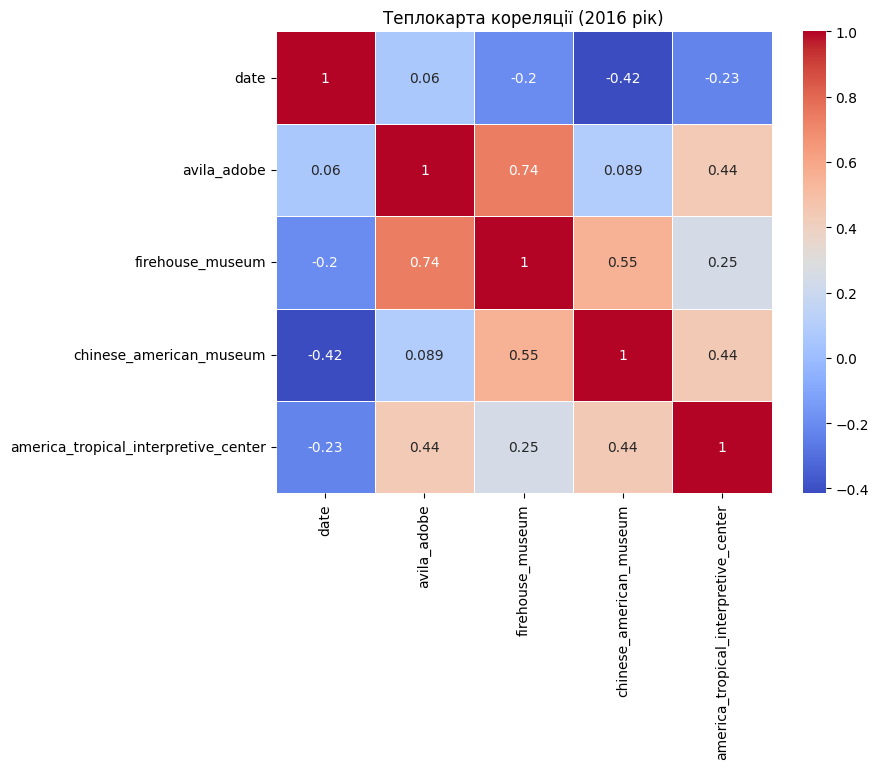

In [86]:
# Побудування теплокарти кореляції для даних 2016 року.

import seaborn as sns
import matplotlib.pyplot as plt

data_2016 = data[data['date'].dt.year == 2016]
correlation_2016 = data_2016.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_2016, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Теплокарта кореляції (2016 рік)')
plt.show()

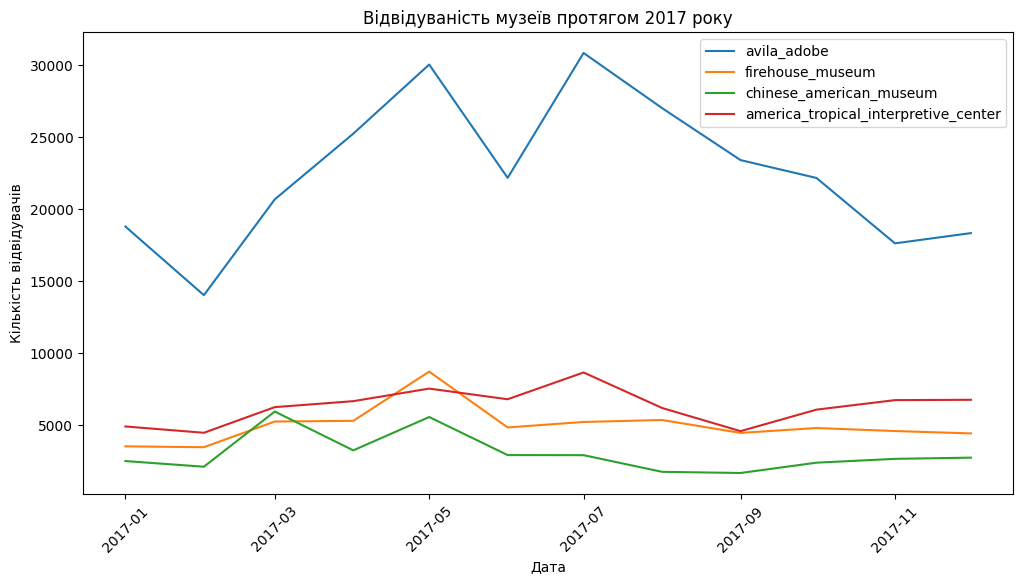

In [87]:
# Побудування графіку ліній для кожного музею, показуючи їхню відвідуваність протягом 2017 року.

data_2017 = data[data['date'].dt.year == 2017]
plt.figure(figsize=(12, 6))
for museum in data.columns[1:]:
    plt.plot(data_2017['date'], data_2017[museum], label=museum)

plt.xlabel('Дата')
plt.ylabel('Кількість відвідувачів')
plt.title('Відвідуваність музеїв протягом 2017 року')
plt.legend()
plt.xticks(rotation=45)
plt.show()

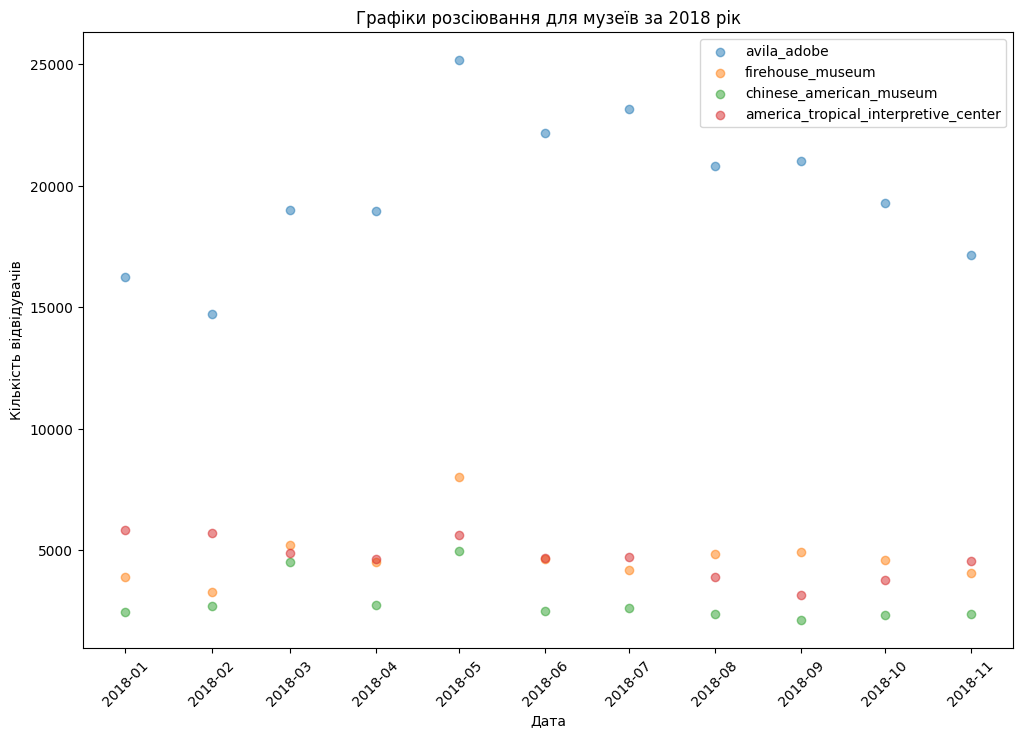

In [88]:
# Побудування графіків розсіювання для кожного музею за 2018 рік.

data_2018 = data[data['date'].dt.year == 2018]
plt.figure(figsize=(12, 8))
for museum in data.columns[1:]:
    plt.scatter(data_2018['date'], data_2018[museum], label=museum, alpha=0.5)

plt.xlabel('Дата')
plt.ylabel('Кількість відвідувачів')
plt.title('Графіки розсіювання для музеїв за 2018 рік')
plt.legend()
plt.xticks(rotation=45)
plt.show()

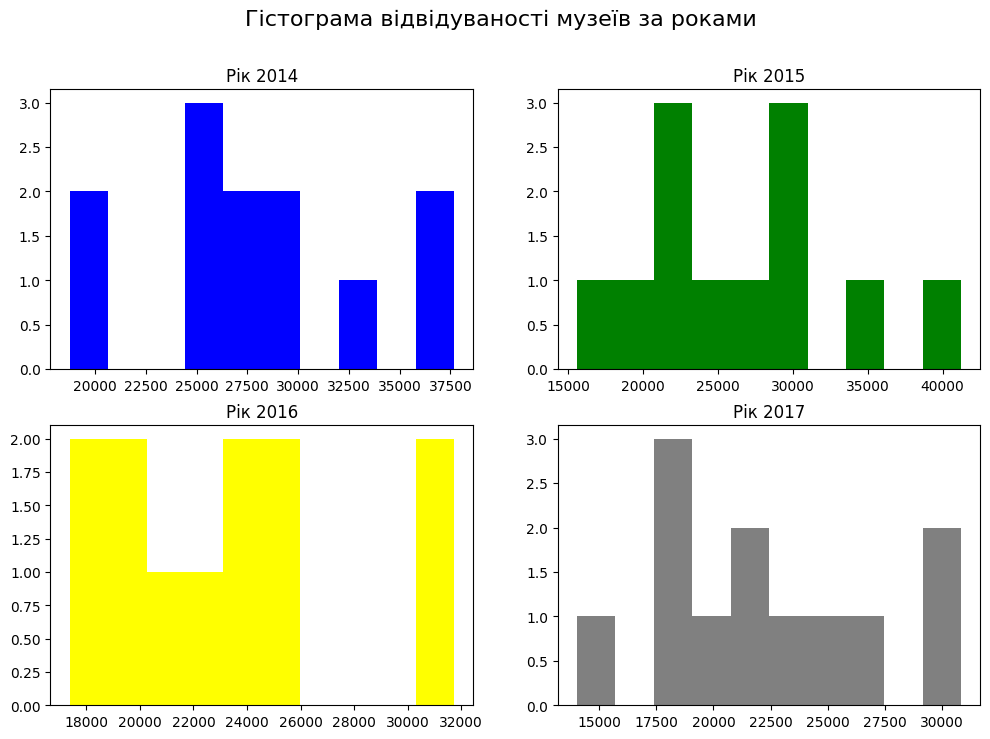

In [95]:
data_2014 = data[data['date'].dt.year == 2014]
data_2015 = data[data['date'].dt.year == 2015]
data_2016 = data[data['date'].dt.year == 2016]
data_2017 = data[data['date'].dt.year == 2017]
colors = ['blue', 'green', 'yellow', 'grey']
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Гістограма відвідуваності музеїв за роками', fontsize=16)
colors = ['blue', 'green', 'yellow', 'gray']

for i, dataset in enumerate([data_2014, data_2015, data_2016, data_2017]):
    axs[i // 2, i % 2].hist(dataset['avila_adobe'], bins=10, color=colors[i])
    axs[i // 2, i % 2].set_title(f'Рік {2014 + i}')

plt.show()

В цій практичній роботі я завантажив датасет і вивів перші 5 рядків для ознайомлення з даними.
Провів попередній аналіз даних, включаючи перевірку розміру таблиці, типів даних та виявлення можливих дублікатів. Виявивши дублікати, я їх видалив, щоб уникнути спотворення аналізу.
ВизначиВ роки, які містить датасет, і перейменував стовпці, замінивши великі букви на маленькі і пробіли на підкреслення.
Розрахував середню кількість відвідувачів для кожного музею протягом всього періоду.
Знайшов мінімальну та максимальну кількість відвідувачів для кожного музею в 2018 році.
Визначив місяці з найвищою та найнижчою загальною кількістю відвідувачів серед усіх музеїв для 2015 року і вивів назви місяців.
Порівняв кількість відвідувачів музею "Avila Adobe" у літні та зимові місяці 2018 року.
Знайшов кореляцію між кількістю відвідувачів в кожному з музеїв та датами у 2016 році.
Побудував теплокарту кореляції, яка візуалізує взаємозв'язки між музеями та датами.
Побудував графік ліній для кожного музею, показуючи їхню відвідуваність протягом 2017 року.
Побудував графіки розсіювання для кожного музею за 2018 рік.
Створив гістограму відвідуваності за місяцями кожного музею для років 2014, 2015, 2016, 2017, з використанням різних кольорів для візуалізації.

Після аналізу та візуалізації даних ми можемо сказати, що датасет містить цікаву інформацію про відвідуваність музеїв впродовж років, а також про їхні місячні коливання. Деякі музеї мали велику кількість відвідувачів, особливо протягом певних років. Крім того, ми визначили взаємозв'язки між музеями та часом, а також виявили, що в певних місяцях кількість відвідувачів музеїв була особливо високою або низькою. Ці відомості можуть бути корисними для подальшого аналізу та планування подій у музеях.